In [1]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\seach\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\seach\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [3]:
'''
Data format

word_index = word : index
reverse_word_index = index : word
'''
word_index =imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)

In [4]:
'''
1. 0,1,2는 '패딩', '문서 시작', '사전에 없음' 이므로 제외
2. 자주 사용한 단어 중 없는 것은 '?'로 대체
3. -3을 함으로써 1번 문자들 제외 가능 ex -> 2 - 3 = -1 이고 -1은 mapping 되어 있지 않음
'''
decoded_review = ' '.join(
    [reverse_word_index.get(i -3,'?') for i in train_data[0]]
)

In [5]:
def vectorize_sequences(sequences,dimension = 10000):
    result = np.zeros((len(sequences),dimension))
    
    for idx ,sequence in enumerate(sequences):
        result[idx,sequence] = 1
        
    return result
    

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
model = Sequential([
    Dense(16, input_shape=(x_train.shape[1],)),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
    ])


In [9]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train= y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6127 - accuracy: 0.7070 - val_loss: 0.4346 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3797 - accuracy: 0.8925 - val_loss: 0.3453 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2653 - accuracy: 0.9221 - val_loss: 0.2906 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1998 - accuracy: 0.9415 - val_loss: 0.2743 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1588 - accuracy: 0.9548 - val_loss: 0.3020 - val_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1304 - accuracy: 0.9628 - val_loss: 0.2896 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0971 - accuracy: 0.9769 - val_loss: 0.2986 - val_accuracy: 0.8864
Epoch 8/20
30

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

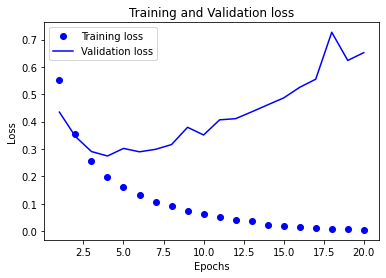

In [13]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[]

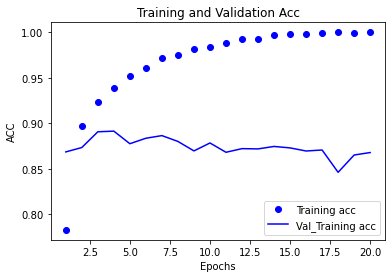

In [14]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Val_Training acc')
plt.title('Training and Validation Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.plot()

In [21]:
model2 = Sequential([
    Dense(16, input_shape=(x_train.shape[1],)),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
    ])


In [22]:
model2.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)

In [23]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs = 5,
                   batch_size = 512,
                   validation_data=(x_val,y_val))

Epoch 1/5
30/30 [==============================] - 1s 34ms/step - loss: 0.6201 - accuracy: 0.6774 - val_loss: 0.4234 - val_accuracy: 0.8630
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3576 - accuracy: 0.9033 - val_loss: 0.3205 - val_accuracy: 0.8861
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2449 - accuracy: 0.9288 - val_loss: 0.2999 - val_accuracy: 0.8825
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1942 - accuracy: 0.9425 - val_loss: 0.3143 - val_accuracy: 0.8729
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1543 - accuracy: 0.9551 - val_loss: 0.2757 - val_accuracy: 0.8901


In [24]:
result = model.evaluate(x_test,y_test)
result2 = model2.evaluate(x_test,y_test)

782/782 [==============================] - 1s 847us/step - loss: 0.2979 - accuracy: 0.8802
